In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set style
sns.set(style='whitegrid')


In [2]:
# Load CSV
df = pd.read_csv("Warehouse_and_Retail_Sales.csv")

# Show top rows
df.head()


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [4]:
# Drop rows with missing values (or you can use imputation)
df_cleaned = df.dropna()

# Verify
df_cleaned.isnull().sum()


YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [5]:
# Basic stats for numeric columns
df_cleaned.describe()


,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000
mean,2018.438238,6.424064,7.003644,6.938177,25.375561
std,1.083080,3.461853,30.387012,30.244239,249.500572
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.260000,3.000000,5.000000
max,2020.000000,12.000000,1816.490000,1990.830000,18317.000000


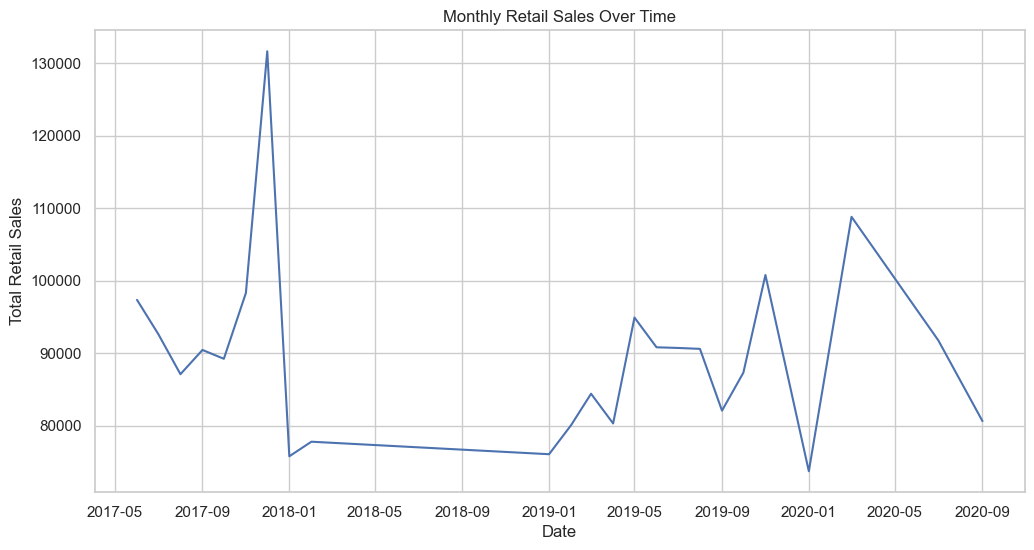

In [6]:
monthly_sales = df_cleaned.groupby(['YEAR', 'MONTH'])['RETAIL SALES'].sum().reset_index()

# Create datetime column
monthly_sales['DATE'] = pd.to_datetime(monthly_sales[['YEAR', 'MONTH']].assign(DAY=1))

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='DATE', y='RETAIL SALES')
plt.title("Monthly Retail Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Retail Sales")
plt.show()


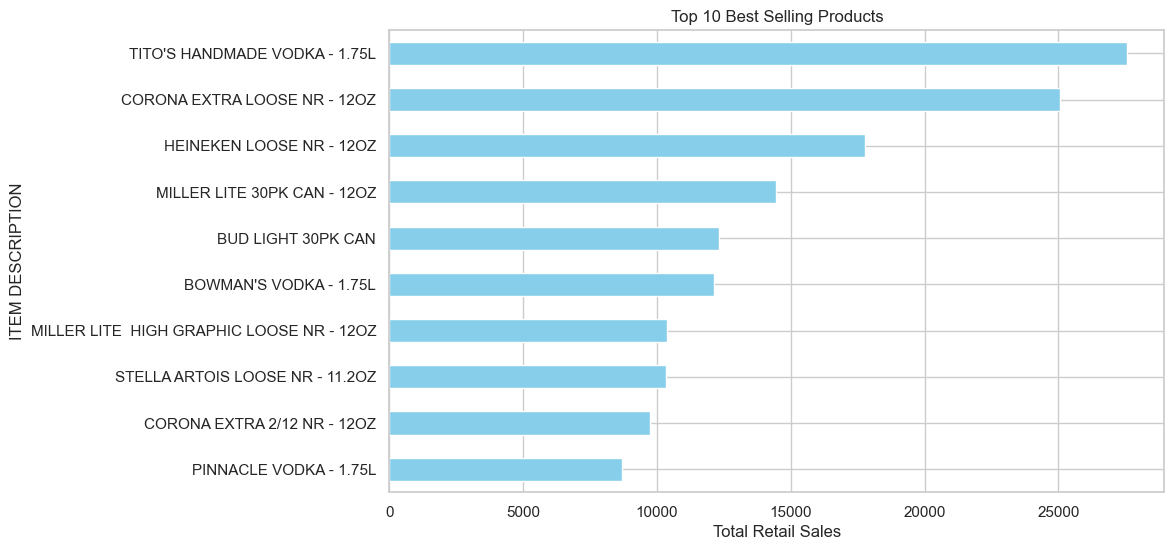

In [7]:
top_products = df_cleaned.groupby('ITEM DESCRIPTION')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='barh', color='skyblue')
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Retail Sales")
plt.gca().invert_yaxis()
plt.show()


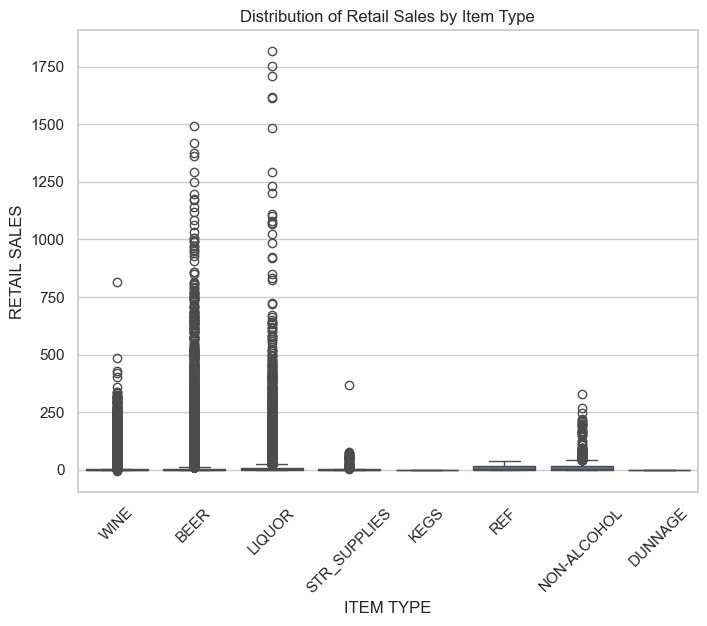

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_cleaned, x='ITEM TYPE', y='RETAIL SALES')
plt.title("Distribution of Retail Sales by Item Type")
plt.xticks(rotation=45)
plt.show()


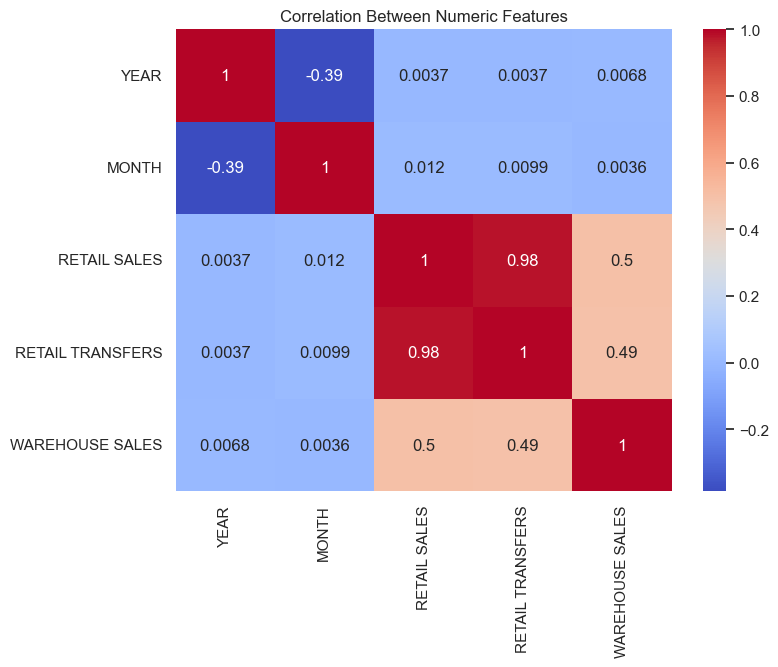

In [10]:
# Correlation Heatmap for numeric features only
numeric_df = df_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()
